<a href="https://colab.research.google.com/github/7330717512/The-Sparks-Foundation-Tasks/blob/main/TSF_GRIPAPR21_TASK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTHOR:- UPRE VINOD**

**TASK:- STOCK MARKET PRICE PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS**

**GIVEN BY:- THE SPARKS FOUNDATION**

**GRIP PROGRAM, DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

In [ ]:
#Importing datasets that is "tesla stocks from yahoo finance" and "india news headlines from" this link https://bit.ly/36fFPI6

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://dataverse.harvard.edu/api/access/datafile/4439522"
tesla = pd.read_csv('/content/drive/MyDrive/TSLA.csv')
news = pd.read_csv(url)

In [ ]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')

import math
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#displaying datasets
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500


In [ ]:
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2579,2021-04-05,707.710022,708.159973,684.700012,691.049988,691.049988,41842800
2580,2021-04-06,690.299988,696.549988,681.369995,691.619995,691.619995,28271800
2581,2021-04-07,687.000000,691.380005,667.840027,670.969971,670.969971,26309400
2582,2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
2583,2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600


In [ ]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


**Feature Engineering**

In [ ]:
#displaying number of records in each datasets
len(tesla), len(news)

(2584, 3424067)

In [ ]:
#checking null values
tesla.isna().any(), news.isna().any()

(Date         False
 Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool, publish_date         False
 headline_category    False
 headline_text        False
 dtype: bool)

In [ ]:
##tesla dataframe

#dropping duplicates
tesla = tesla.drop_duplicates()

#converting the 'Date' column from object to Datetime
tesla['Date'] = pd.to_datetime(tesla['Date']).dt.normalize()

##filtering the important columns required
tesla = tesla.filter(['Date', 'Close','Open', 'High', 'Low', 'Volume'])

#setting column 'Date' as the index column
tesla.set_index('Date', inplace=True)

#sorting the data according to the index 
tesla = tesla.sort_index(ascending=True, axis=0)

tesla

,Close,Open,High,Low,Volume
Date,,,,,
2011-01-03,5.324000,5.368000,5.400000,5.180000,6415000
2011-01-04,5.334000,5.332000,5.390000,5.204000,5937000
2011-01-05,5.366000,5.296000,5.380000,5.238000,7233500
2011-01-06,5.576000,5.366000,5.600000,5.362000,10306000
2011-01-07,5.648000,5.600000,5.716000,5.580000,11239500
...,...,...,...,...,...
2021-04-05,691.049988,707.710022,708.159973,684.700012,41842800
2021-04-06,691.619995,690.299988,696.549988,681.369995,28271800
2021-04-07,670.969971,687.000000,691.380005,667.840027,26309400


In [ ]:
##news dataframe

#dropping duplicates
news = news.drop_duplicates()

#converting the publishdate into datetime datatype
news['publish_date'] = news['publish_date'].astype(str)
news['publish_date'] = news['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
news['publish_date'] = pd.to_datetime(news['publish_date']).dt.normalize()

#filtering the important columns required
news = news.filter(['publish_date', 'headline_text'])

#gruoping the news headlines by date
news = news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

#setting column 'Date' as the index column
news.set_index('publish_date', inplace=True)

#sorting the data according to the index
news = news.sort_index(ascending=True, axis=0)
news

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [ ]:
##concatinating the datasets tesla and news
combined_data = pd.concat([tesla, news], axis=1)

#dropping the null values if any
combined_data.dropna(axis=0, inplace=True)

#displaying the combined dataset
combined_data

,Close,Open,High,Low,Volume,headline_text
2011-01-03,5.324000,5.36800,5.400000,5.180000,6415000.0,"Photo Gallery (Ashes 2010),Your guy needs comp..."
2011-01-04,5.334000,5.33200,5.390000,5.204000,5937000.0,"Deepika Padukone,Deepika Padukone,Imran invite..."
2011-01-05,5.366000,5.29600,5.380000,5.238000,7233500.0,Man dies of heart attack after killing lover's...
2011-01-06,5.576000,5.36600,5.600000,5.362000,10306000.0,"Photo Gallery (Indian tour of South Africa),Ra..."
2011-01-07,5.648000,5.60000,5.716000,5.580000,11239500.0,"Rishi gives look test for KJo,Tom Hanks to be ..."
...,...,...,...,...,...,...
2020-12-24,661.770020,642.98999,666.090027,641.000000,22865600.0,How to set the mood for sex during cold winter...
2020-12-28,663.690002,674.51001,681.400024,660.799988,32278600.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,665.989990,661.00000,669.900024,655.000000,22910800.0,Man recovers charred remains of 'thief' from h...
2020-12-30,694.780029,672.00000,696.599976,668.359985,42846000.0,Numerology Readings 30 December 2020: Predicti...


In [ ]:
##calculating sentiment scores

combined_data['compound'] = ''
combined_data['negative'] = ''
combined_data['neutral'] = ''
combined_data['positive'] = ''
combined_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2011-01-03,5.324,5.368,5.400,5.180,6415000.0,"Photo Gallery (Ashes 2010),Your guy needs comp...",,,,
2011-01-04,5.334,5.332,5.390,5.204,5937000.0,"Deepika Padukone,Deepika Padukone,Imran invite...",,,,
2011-01-05,5.366,5.296,5.380,5.238,7233500.0,Man dies of heart attack after killing lover's...,,,,
2011-01-06,5.576,5.366,5.600,5.362,10306000.0,"Photo Gallery (Indian tour of South Africa),Ra...",,,,
2011-01-07,5.648,5.600,5.716,5.580,11239500.0,"Rishi gives look test for KJo,Tom Hanks to be ...",,,,


In [ ]:
#import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#importing required libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

#initializing the Sentimentanalyzer
sid = SentimentIntensityAnalyzer()

#calculating sentiment scores
combined_data['compound'] = combined_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
combined_data['negative'] = combined_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
combined_data['neutral'] = combined_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
combined_data['positive'] = combined_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

#displaying the data
combined_data.head()


,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2011-01-03,5.324,5.368,5.400,5.180,6415000.0,"Photo Gallery (Ashes 2010),Your guy needs comp...",-0.9995,0.148,0.752,0.100
2011-01-04,5.334,5.332,5.390,5.204,5937000.0,"Deepika Padukone,Deepika Padukone,Imran invite...",-0.9993,0.116,0.800,0.083
2011-01-05,5.366,5.296,5.380,5.238,7233500.0,Man dies of heart attack after killing lover's...,-0.9998,0.140,0.784,0.076
2011-01-06,5.576,5.366,5.600,5.362,10306000.0,"Photo Gallery (Indian tour of South Africa),Ra...",-0.9997,0.124,0.792,0.083
2011-01-07,5.648,5.600,5.716,5.580,11239500.0,"Rishi gives look test for KJo,Tom Hanks to be ...",-0.9998,0.133,0.796,0.071


In [ ]:
##finalising dataset and writing to disk

#dropping the headline text which is unwanted now
combined_data.drop(['headline_text'], inplace=True, axis=1)

#rearrange the columns
combined_data = combined_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

#displaying
combined_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2011-01-03,5.324,-0.9995,0.148,0.752,0.100,5.368,5.400,5.180,6415000.0
2011-01-04,5.334,-0.9993,0.116,0.800,0.083,5.332,5.390,5.204,5937000.0
2011-01-05,5.366,-0.9998,0.140,0.784,0.076,5.296,5.380,5.238,7233500.0
2011-01-06,5.576,-0.9997,0.124,0.792,0.083,5.366,5.600,5.362,10306000.0
2011-01-07,5.648,-0.9998,0.133,0.796,0.071,5.600,5.716,5.580,11239500.0


In [ ]:
#saving dataset for further use
combined_data.to_csv('combined_data.csv')

In [ ]:
##Feature engineering of the combined data
combined_data.shape

(2517, 9)

In [ ]:
#checking null values
combined_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-01-03 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     2517 non-null   float64
 1   compound  2517 non-null   float64
 2   negative  2517 non-null   float64
 3   neutral   2517 non-null   float64
 4   positive  2517 non-null   float64
 5   Open      2517 non-null   float64
 6   High      2517 non-null   float64
 7   Low       2517 non-null   float64
 8   Volume    2517 non-null   float64
dtypes: float64(9)
memory usage: 196.6 KB


Text(0, 0.5, 'Çlose price $')

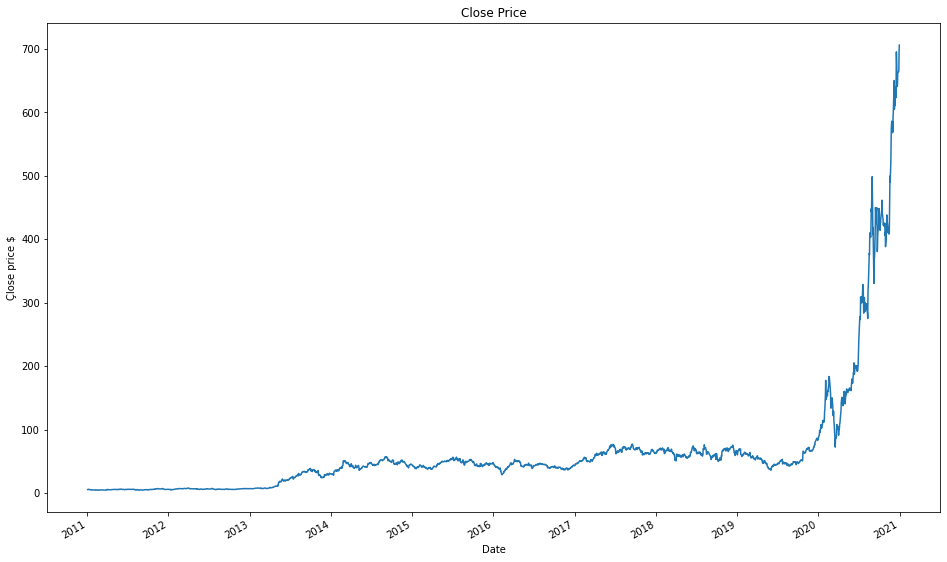

In [ ]:
##EDA of the data

plt.figure(figsize=(16,10))

#plotting close price
combined_data['Close'].plot()

#setting pplot title,, x and y label
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Çlose price $')

In [ ]:
#calculating 7 day rolling mean
combined_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11,5.475714,-0.999571,0.129143,0.786000,0.084571,5.473429,5.566286,5.365429,8.056500e+06
2011-01-12,5.485429,-0.999600,0.127000,0.789857,0.082857,5.478286,5.577714,5.383143,7.828929e+06
2011-01-13,5.472571,-0.999643,0.129286,0.785143,0.085429,5.486857,5.578286,5.387143,7.497643e+06
2011-01-14,5.441714,-0.999614,0.126286,0.787286,0.086286,5.477429,5.569143,5.370571,7.315714e+06


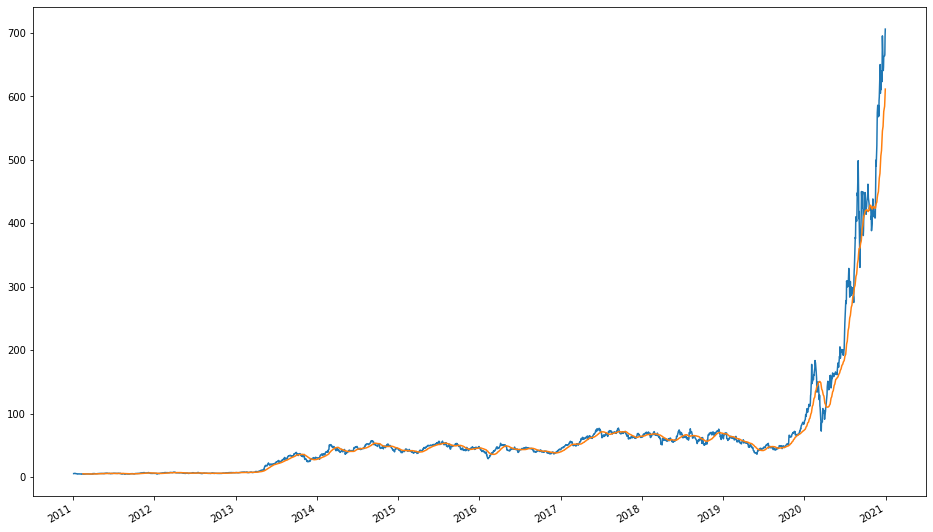

In [ ]:
plt.figure(figsize=(16,10))

combined_data['Close'].plot()
combined_data.rolling(window=30).mean()['Close'].plot()

In [ ]:
##Data preparation for modeling
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(combined_data)-1))

#using 80% of data for trainng
train_data = int(data_to_use*0.8)
total_data = len(combined_data)
start = total_data - data_to_use

#printing number of records in train and test datasets
print("Number of records in Training Data:", train_data)
print("Number of records in Test Data:", total_data-train_data)

Number of records in Training Data: 2012
Number of records in Test Data: 505


In [ ]:
close_price = combined_data.iloc[start:total_data,0]#close
compound = combined_data.iloc[start:total_data,1]
negative = combined_data.iloc[start:total_data,2]
neutral = combined_data.iloc[start:total_data,3]
positive = combined_data.iloc[start:total_data,4]
open_price = combined_data.iloc[start:total_data,5]
high = combined_data.iloc[start:total_data,6]
low = combined_data.iloc[start:total_data,7]
volume = combined_data.iloc[start:total_data,8]

#printing Close price
print('Close price')
close_price

Close price


2011-01-04      5.334000
2011-01-05      5.366000
2011-01-06      5.576000
2011-01-07      5.648000
2011-01-10      5.690000
                 ...    
2020-12-24    661.770020
2020-12-28    663.690002
2020-12-29    665.989990
2020-12-30    694.780029
2020-12-31    705.669983
Name: Close, Length: 2516, dtype: float64

In [ ]:
#shifted next day close
close_price_shifted = close_price.shift(-1)

#shifting next day compound
compound_shifted = compound.shift(-1)

data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

#setting column names
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted', 'volume','open_price','high','low']

#dropping nulls
data = data.dropna()
data.head(20)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
2011-01-04,5.334,5.366,-0.9993,-0.9998,5937000.0,5.332,5.390,5.204
2011-01-05,5.366,5.576,-0.9998,-0.9997,7233500.0,5.296,5.380,5.238
2011-01-06,5.576,5.648,-0.9997,-0.9998,10306000.0,5.366,5.600,5.362
2011-01-07,5.648,5.690,-0.9998,-0.9994,11239500.0,5.600,5.716,5.580
2011-01-10,5.690,5.392,-0.9994,-0.9995,6713500.0,5.634,5.736,5.610
2011-01-11,5.392,5.392,-0.9995,-0.9997,8551000.0,5.718,5.742,5.384
2011-01-12,5.392,5.244,-0.9997,-0.9996,4822000.0,5.402,5.480,5.304
2011-01-13,5.244,5.150,-0.9996,-0.9996,3618000.0,5.392,5.394,5.232
2011-01-14,5.150,5.128,-0.9996,-0.9998,5960000.0,5.230,5.316,5.122
2011-01-18,5.128,4.806,-0.9998,-0.9996,8108500.0,5.096,5.128,4.950


In [ ]:
#setting target variable
y = data['close_price_shifted']
y

2011-01-04      5.366000
2011-01-05      5.576000
2011-01-06      5.648000
2011-01-07      5.690000
2011-01-10      5.392000
                 ...    
2020-12-23    661.770020
2020-12-24    663.690002
2020-12-28    665.989990
2020-12-29    694.780029
2020-12-30    705.669983
Name: close_price_shifted, Length: 2515, dtype: float64

In [ ]:
X = data.drop(['close_price_shifted'],axis=1)
X

,close_price,compound,compound_shifted,volume,open_price,high,low
2011-01-04,5.334000,-0.9993,-0.9998,5937000.0,5.332000,5.390000,5.204000
2011-01-05,5.366000,-0.9998,-0.9997,7233500.0,5.296000,5.380000,5.238000
2011-01-06,5.576000,-0.9997,-0.9998,10306000.0,5.366000,5.600000,5.362000
2011-01-07,5.648000,-0.9998,-0.9994,11239500.0,5.600000,5.716000,5.580000
2011-01-10,5.690000,-0.9994,-0.9995,6713500.0,5.634000,5.736000,5.610000
...,...,...,...,...,...,...,...
2020-12-23,645.979980,-0.9995,-0.9966,33173000.0,632.200012,651.500000,622.570007
2020-12-24,661.770020,-0.9966,-0.9997,22865600.0,642.989990,666.090027,641.000000
2020-12-28,663.690002,-0.9997,-0.9997,32278600.0,674.510010,681.400024,660.799988
2020-12-29,665.989990,-0.9997,-0.9997,22910800.0,661.000000,669.900024,655.000000


In [ ]:
##scaling the records
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = np.array(X).reshape((len(X), 7))
X = scaler.fit_transform(X)

#scaling the target
y = np.array(y).reshape((len(y), 1))
y = scaler_x.fit_transform(y)

X,y

(array([[-0.99719678, -0.99929996, -0.99979999, ..., -0.99708724,
         -0.99729537, -0.99704278],
        [-0.99710411, -0.99979999, -0.99969998, ..., -0.99719467,
         -0.99732426, -0.99694039],
        [-0.99649597, -0.99969998, -0.99979999, ..., -0.99698577,
         -0.99668856, -0.99656698],
        ...,
        [ 0.90932969, -0.99969998, -0.99969998, ...,  1.        ,
          0.95607877,  0.97723366],
        [ 0.91599021, -0.99969998, -0.99969998, ...,  0.95968088,
          0.92284878,  0.95976744],
        [ 0.99936299, -0.99969998, -0.99959998, ...,  0.99250915,
          1.        ,  1.        ]]), array([[-0.99714817],
        [-0.99654929],
        [-0.99634395],
        ...,
        [ 0.88683939],
        [ 0.9689437 ],
        [ 1.        ]]))

In [ ]:
##Dividing dataset into train and test
X_train = X[0:train_data,]
X_test = X[train_data+1 : len(X),]
y_train = y[0 : train_data]
y_test = y[train_data+1 : len(y)]

print("Number of rows and columns in the training set X:", X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the training set X: (2012, 7) and y: (2012, 1)
Number of rows and columns in the test set X: (502, 7) and y: (502, 1)


In [ ]:
##reshaping the feature dataset
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape + (1,))

#printing the re shaping dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (2012, 7, 1)
Shape of Test set X: (502, 7, 1)


In [ ]:
##modelling with LSTM
np.random.seed(42)

model = Sequential()
model.add(LSTM(100, return_sequences=True, activation='relu',input_shape = (7,1)))
model.add(Dropout(0.1))
model.add(LSTM(100, return_sequences=True, activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
#compiling the model
model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
202/202 [==============================] - 7s 18ms/step - loss: 0.1341 - val_loss: 0.0026
Epoch 2/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0039 - val_loss: 2.8219e-04
Epoch 3/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 4/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 5/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 6/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 7/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 7.5971e-04
Epoch 8/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 9/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 10/10
202/202 [==============================] - 3s 15ms/step - loss: 0.0021 

In [ ]:
#saving the model
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

model.save_weights('model.h5')
print('model is saved to disk')  

model is saved to disk


In [ ]:
##Predictions
predictions = model.predict(X_test)

#unscaling predictions
predictions = scaler_x.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

print('predictions:')
predictions[0:5]

predictions:


array([[-0.85882956],
       [-0.852955  ],
       [-0.8529871 ],
       [-0.85774696],
       [-0.8539906 ]], dtype=float32)

In [ ]:
train_loss = model.evaluate(X_train, y_train, batch_size=1)

test_loss = model.evaluate(X_test, y_test, batch_size=1)

print('Trainloss=', round(train_loss,4))
print('Test loss=', round(test_loss,4))

502/502 [==============================] - 1s 3ms/step - loss: 0.3109
Trainloss= 0.0005
Test loss= 0.3109


In [ ]:
rmse = metrics.mean_squared_error(y_test, predictions)
print('root mean squared error=', round(np.sqrt(rmse),4))

root mean squared error= 0.5575


In [ ]:
##unscaling datasets
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), 7)))

y_train = scaler_x.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_x.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))


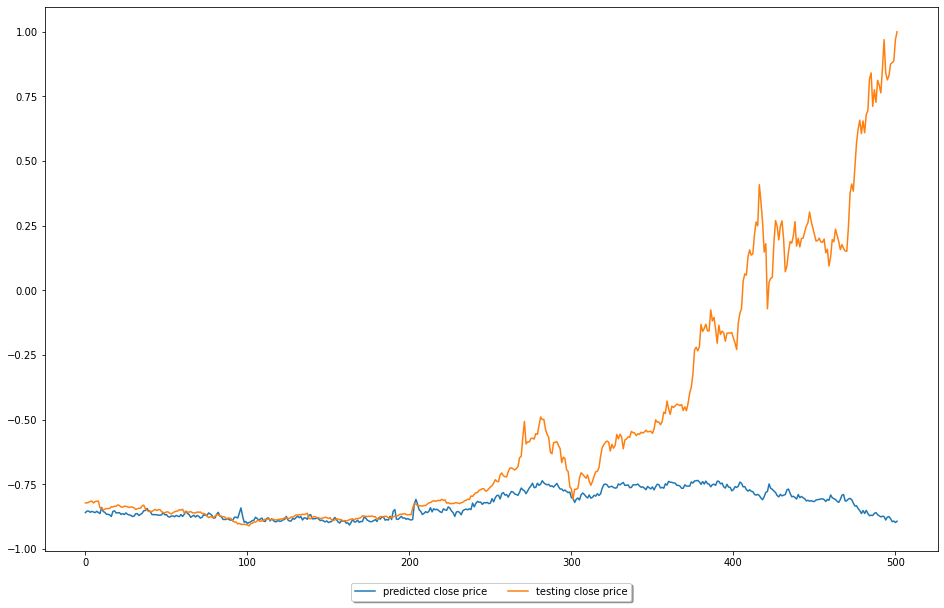

In [ ]:
#plotting
plt.figure(figsize=(16,10))

plt.plot(predictions, label='predicted close price')
plt.plot([row[0] for row in y_test], label='testing close price')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=2)
plt.show()